## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## importing our data

In [2]:
#movie = pd.read_csv('./data/ml-20m/movie.csv',index_col=False)
#rating = pd.read_csv('./data/ml-20m/rating.csv')
movie = pd.read_csv('./data/ml-latest-small/movies.csv',index_col=False)
rating = pd.read_csv('./data/ml-latest-small/ratings.csv')

### Let's take a look at our data

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movie.shape,rating.shape

((9742, 3), (100836, 4))

In [6]:
rating.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


In [7]:
movie.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movieId,9742,NaN,NaN,NaN,42200.4,52160.5,1,3248.25,7300,76232,193609
title,9742,9737,Emma (1996),2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,9742,951,Drama,1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging out Dataset

In [8]:
data = pd.merge(movie,rating,on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [9]:
data.shape

(100836, 6)

In [11]:
data.nunique()

movieId       9724
title         9719
genres         951
userId         610
rating          10
timestamp    85043
dtype: int64

## Recommend the movies with similiar rating

### Calulate Average Rating

In [12]:
avg_rating = data.groupby('title')['rating'].mean()
avg_rating

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [13]:
avg_rating.sort_values(ascending=False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

### Calculating Total Ratings given by users

In [14]:
tatal_rating = data.groupby('title')['rating'].count()
tatal_rating

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

### Now creating a DataFrame of both Average rating and Total Rating of Movies

In [15]:
df = pd.DataFrame()
df['Average_rating'] = avg_rating
df['Total_Rating'] = tatal_rating

In [16]:
df.tail

<bound method NDFrame.tail of                                            Average_rating  Total_Rating
title                                                                  
'71 (2014)                                       4.000000             1
'Hellboy': The Seeds of Creation (2004)          4.000000             1
'Round Midnight (1986)                           3.500000             2
'Salem's Lot (2004)                              5.000000             1
'Til There Was You (1997)                        4.000000             2
...                                                   ...           ...
eXistenZ (1999)                                  3.863636            22
xXx (2002)                                       2.770833            24
xXx: State of the Union (2005)                   2.000000             5
¡Three Amigos! (1986)                            3.134615            26
À nous la liberté (Freedom for Us) (1931)        1.000000             1

[9719 rows x 2 columns]>

In [17]:
df.head()

,Average_rating,Total_Rating
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [18]:
df.shape

(9719, 2)

### Visualization

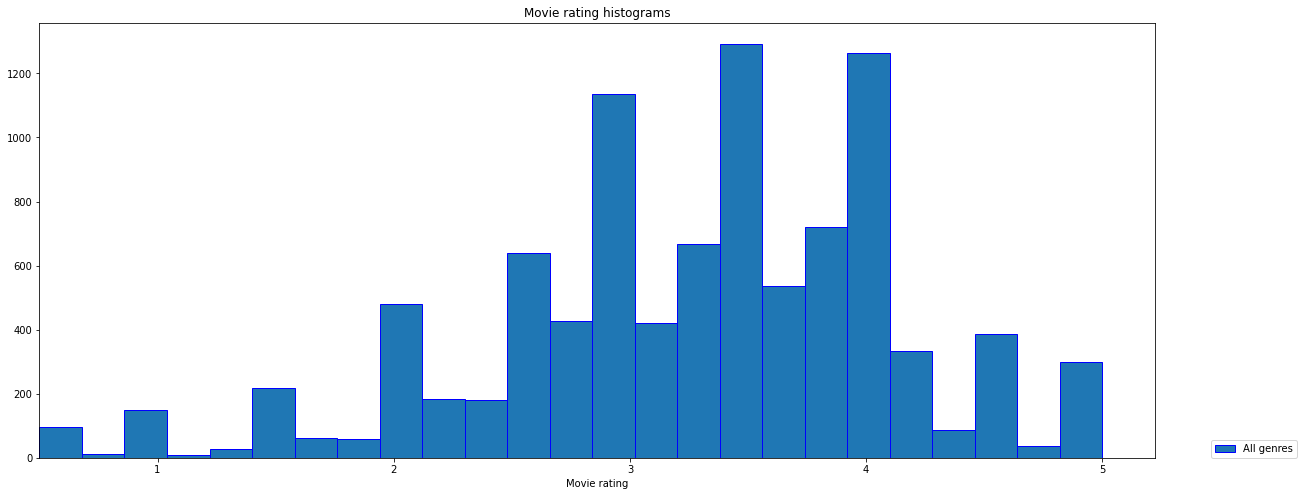

In [19]:
avg_rating.hist(bins=25,grid=False,edgecolor='b',label='All genres',figsize=(20,8))
plt.legend(loc=(1.05,0),ncol=2)
plt.xlim(0.5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

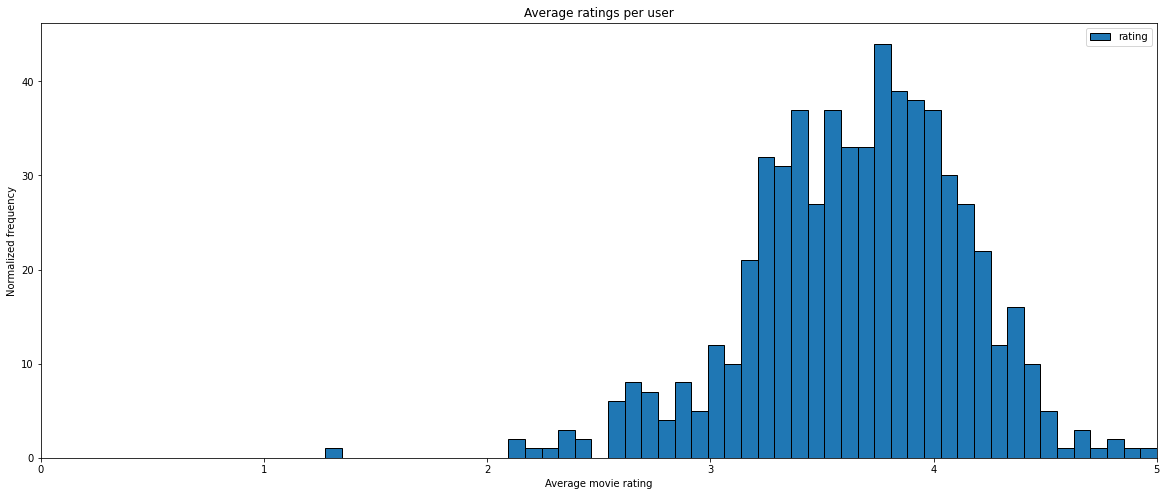

In [20]:
user_rating = rating[['userId','rating']].groupby('userId').mean()

# Plot histogram
user_rating.plot(kind='hist', bins=50, grid=0, edgecolor='black', figsize=(20,8))

plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

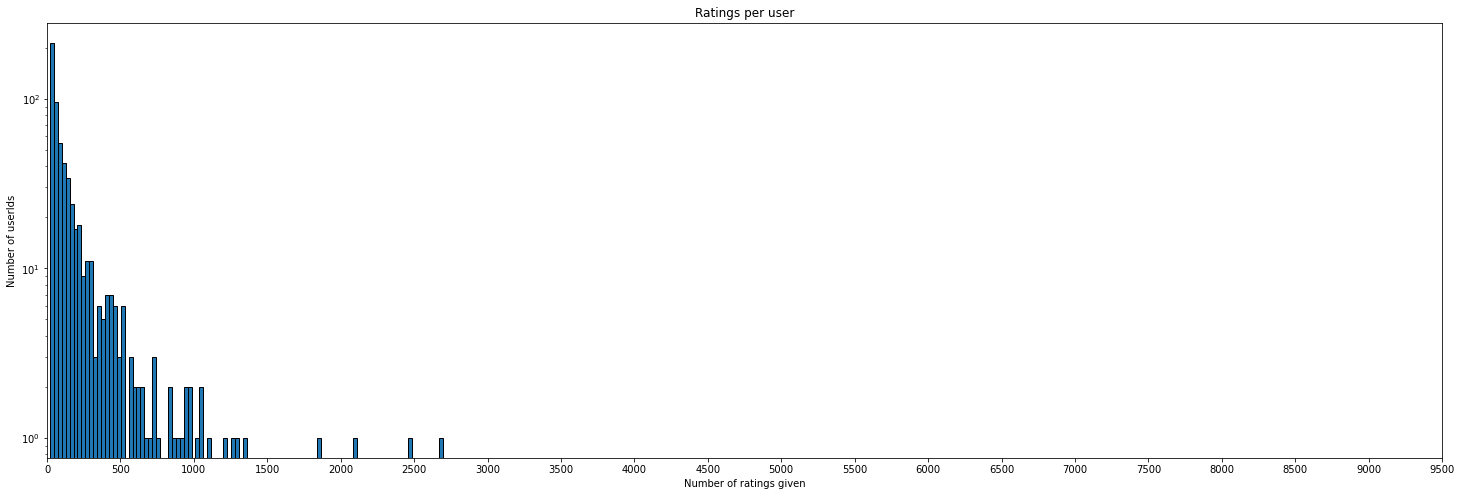

In [21]:
# Histogram of ratings counts.

user_rating = rating[['userId', 'movieId']].groupby('userId').count()
user_rating.columns=['num_ratings']

plt.figure(figsize=(25,8))
plt.hist(user_rating.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of userIds')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,500))
plt.show()

<Figure size 1800x1080 with 0 Axes>

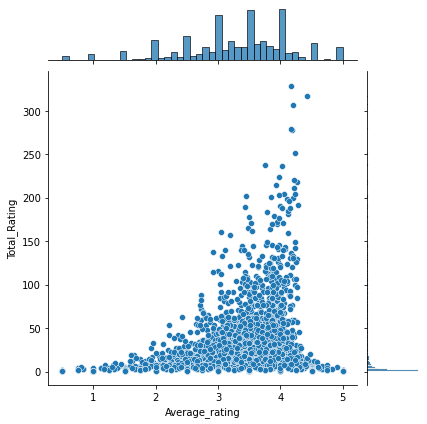

In [22]:
plt.figure(figsize=(25,15))
sns.jointplot(df.Average_rating, df.Total_Rating,)
plt.xlabel('Average Rating')
plt.ylabel('Total Rating')
plt.xlim(0,)
plt.show()

In [23]:
data.shape

(100836, 6)

In [24]:
new_data = data.iloc[0:70000]
new_data.shape

(70000, 6)

### Recommending Similar Movies 

In [25]:
#sorting values according to num of rating column
movie_title = new_data.pivot_table(index='userId',columns='title',values='rating')

In [26]:
movie_title.head()

title,'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),...All the Marbles (1981),...And Justice for All (1979),1-900 (06) (1994),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),...,Zero Effect (1998),Zeus and Roxanne (1997),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zone 39 (1997),Zoolander (2001),Zulu (1964),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
movie_title.shape

(610, 4240)

### Movie Recommendation System based on Movie
- User can enter a movie name and number of recommendtion he want.

- This system will recommend user the similar Movies on the basis of input.

- Just try and Play with it.

In [28]:
def movie_recommendation():
    # Taking Movie as a Input on whose basic User want recommendation
    movie = input("Please Enter Movie Name : ")
    
    # How many Recommendation should be shown to user
    n = int(input("How many recommendation you need : "))
    
    # getting its rating from our data
    user_rating = movie_title[movie]
    
    # Finding Movies with similar rating
    similar_movie = movie_title.corrwith(user_rating)
    
    similar_movie = pd.DataFrame(similar_movie,columns=['Correlation'])
    
    similar_movie = similar_movie.join(df['Total_Rating'])
    
    # Sorting related
    rec_ = similar_movie.sort_values(by=['Correlation','Total_Rating'],ascending=False)
    
    rec = pd.DataFrame(rec_)
    
    rec.drop_duplicates()
    print()
    print()
    
    print("Following are the {} Recommended Movies".format(n))
    
    return rec.head(n)


In [29]:
movie_recommendation()

Please Enter Movie Name : Fight Club (1999)
How many recommendation you need : 10


Following are the 10 Recommended Movies


,Correlation,Total_Rating
title,,
Fight Club (1999),1.0,218
"Juror, The (1996)",1.0,17
Balto (1995),1.0,8
Night of the Comet (1984),1.0,8
Funny Face (1957),1.0,7
"Spitfire Grill, The (1996)",1.0,7
To Sir with Love (1967),1.0,7
Village of the Damned (1960),1.0,6
Babes in Toyland (1961),1.0,5


### Now lets move on to recommend or search movie according to Average Mean based on Tag and Genre

In [31]:
genre_labels = set()
for s in movie['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
    
genre_labels = list(genre_labels)
genre_labels

['Romance',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Thriller',
 'Adventure',
 'Children',
 'Action',
 'Animation',
 'Fantasy',
 'Comedy',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 '(no genres listed)',
 'Crime',
 'Documentary',
 'Drama',
 'Horror']

#### Visualizing Genres

In [33]:
!pip install wordcloud

You should consider upgrading via the '/Users/apple/Desktop/深度学习/DeepLearningwithPyTorch_Code/venv/bin/python -m pip install --upgrade pip' command.


In [35]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [36]:
def count_word(df,ref_col,liste):
    keyword_count = dict()
    
    for s in liste:
        keyword_count[s] = 0
        
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords):
            continue
            
        for s in liste_keywords:
            if pd.notnull(s):
                keyword_count[s] += 1
                
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
        
    keyword_occurences.sort(key = lambda x : x[1],reverse = True)
    
    return keyword_occurences,keyword_count

In [37]:
keyword_occurences,dum=count_word(movie,'genres',genre_labels)
keyword_occurences

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 382],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 34]]

In [38]:
keyword_occurences[0:50]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 382],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 34]]

In [42]:
len(keyword_occurences)

20

In [43]:
words = dict()
for s in keyword_occurences:
    words[s[0]] = s[1]

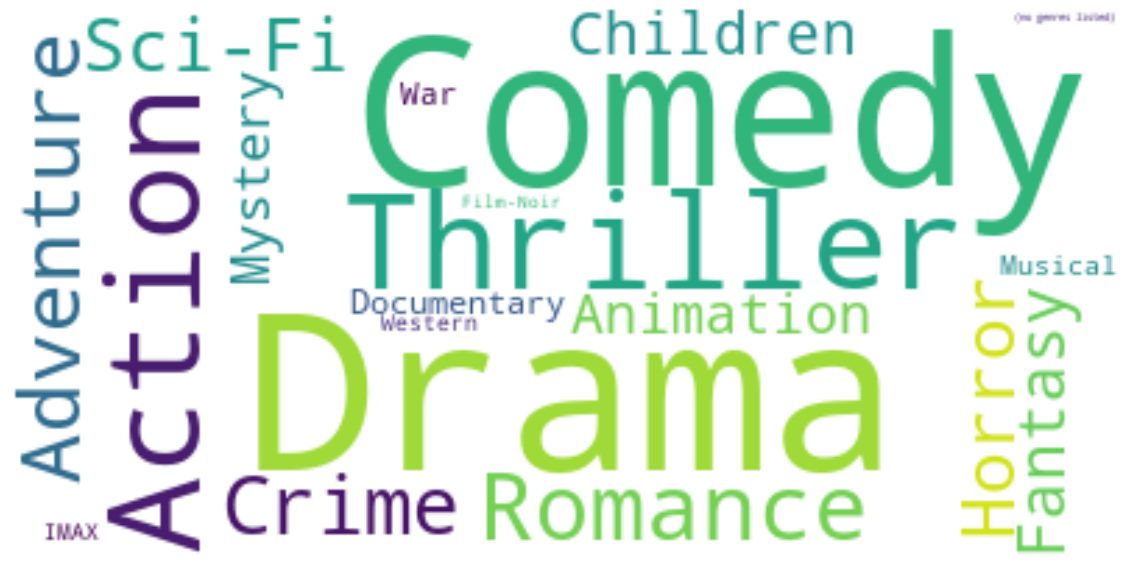

In [44]:
# instantiate a word cloud object
word_cloud = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)

# generate the word cloud
word_cloud.generate_from_frequencies(words)
plt.figure(figsize=(20,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

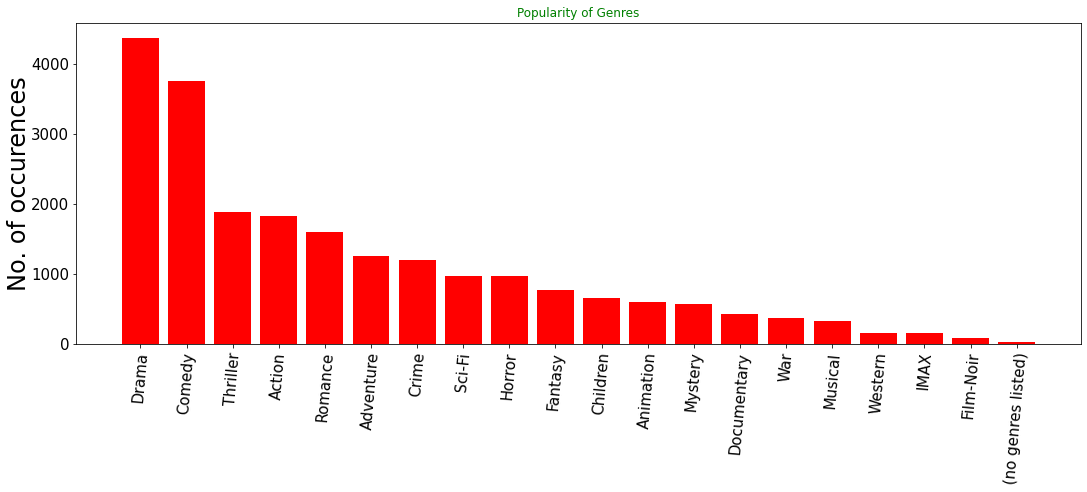

In [45]:
fig = plt.figure(1,figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]
x_label = [i[0] for i in keyword_occurences]
plt.xticks(rotation = 85,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis,x_label)
plt.ylabel("No. of occurences",fontsize = 24,labelpad=0)
ax2.bar(x_axis,y_axis,align='center',color='r')
plt.title('Popularity of Genres',color='g')
plt.show()

In [46]:
for i in genre_labels:
    movie[i] = movie.apply(lambda _ : int(i in _.genres),axis=1)

In [48]:
movie.head()

,movieId,title,genres,Romance,Mystery,Sci-Fi,IMAX,Thriller,Adventure,Children,...,Comedy,War,Musical,Western,Film-Noir,(no genres listed),Crime,Documentary,Drama,Horror
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9742 non-null   int64 
 1   title               9742 non-null   object
 2   genres              9742 non-null   object
 3   Romance             9742 non-null   int64 
 4   Mystery             9742 non-null   int64 
 5   Sci-Fi              9742 non-null   int64 
 6   IMAX                9742 non-null   int64 
 7   Thriller            9742 non-null   int64 
 8   Adventure           9742 non-null   int64 
 9   Children            9742 non-null   int64 
 10  Action              9742 non-null   int64 
 11  Animation           9742 non-null   int64 
 12  Fantasy             9742 non-null   int64 
 13  Comedy              9742 non-null   int64 
 14  War                 9742 non-null   int64 
 15  Musical             9742 non-null   int64 
 16  Western             9742

In [50]:
movie['movieId'] = movie['movieId'].astype(object)

In [51]:
avg_movieid_rating = pd.DataFrame(rating.groupby('movieId')['rating'].agg(['mean','count']))
avg_movieid_rating.head()

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


In [52]:
movies = pd.merge(avg_movieid_rating,movie,on='movieId')
movies.head()

,movieId,mean,count,title,genres,Romance,Mystery,Sci-Fi,IMAX,Thriller,...,Comedy,War,Musical,Western,Film-Noir,(no genres listed),Crime,Documentary,Drama,Horror
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,2.357143,7,Waiting to Exhale (1995),Comedy|Drama|Romance,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,3.071429,49,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
tags = pd.read_csv('./data/ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [54]:
tags.shape

(3683, 4)

In [55]:
tags.nunique()

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

In [56]:
tags.drop(['timestamp'],axis=1,inplace=True)

#### Visualizing Tags

In [58]:
tag_labels = [i for i in tags.tag.unique()]
tag_labels

['funny',
 'Highly quotable',
 'will ferrell',
 'Boxing story',
 'MMA',
 'Tom Hardy',
 'drugs',
 'Leonardo DiCaprio',
 'Martin Scorsese',
 'way too long',
 'Al Pacino',
 'gangster',
 'mafia',
 'Mafia',
 'holocaust',
 'true story',
 'twist ending',
 'Anthony Hopkins',
 'courtroom drama',
 'britpop',
 'indie record label',
 'music',
 'dumpster diving',
 'Sustainability',
 'romantic comedy',
 'wedding',
 'painter',
 'bloody',
 'black hole',
 'sci-fi',
 'time-travel',
 'fantasy',
 'magic board game',
 'Robin Williams',
 'beautiful scenery',
 'epic',
 'historical',
 'inspirational',
 'Medieval',
 'mel gibson',
 'Oscar (Best Cinematography)',
 'revenge',
 'sword fight',
 'black comedy',
 'Christina Ricci',
 'Christopher Lloyd',
 'dark comedy',
 'family',
 'gothic',
 'Andy Garcia',
 'Classic',
 'Francis Ford Coppola',
 'Family',
 'quirky',
 'Macaulay Culkin',
 'sequel',
 'animation',
 'Disney',
 'original',
 'Pixar',
 'Tom Hanks',
 'ancient Rome',
 'Epic',
 'history',
 'imdb top 250',
 'Rome'

In [59]:
tag_keyword_occurences,tag_dum = count_word(tags,'tag',tag_labels)
tag_keyword_occurences

[['In Netflix queue', 131],
 ['atmospheric', 36],
 ['superhero', 24],
 ['thought-provoking', 24],
 ['funny', 23],
 ['Disney', 23],
 ['surreal', 23],
 ['religion', 22],
 ['sci-fi', 21],
 ['dark comedy', 21],
 ['quirky', 21],
 ['psychology', 21],
 ['suspense', 20],
 ['twist ending', 19],
 ['visually appealing', 19],
 ['crime', 19],
 ['politics', 18],
 ['music', 16],
 ['time travel', 16],
 ['mental illness', 16],
 ['dark', 15],
 ['comedy', 15],
 ['aliens', 15],
 ['space', 14],
 ['mindfuck', 14],
 ['dreamlike', 14],
 ['black comedy', 13],
 ['emotional', 13],
 ['heist', 13],
 ['anime', 12],
 ['action', 12],
 ['satire', 12],
 ['high school', 12],
 ['disturbing', 12],
 ['Shakespeare', 12],
 ['journalism', 12],
 ['Stephen King', 12],
 ['court', 12],
 ['imdb top 250', 11],
 ['comic book', 11],
 ['classic', 11],
 ['psychological', 11],
 ['Holocaust', 11],
 ['adolescence', 11],
 ['adultery', 11],
 ['boxing', 11],
 ['drugs', 10],
 ['Leonardo DiCaprio', 10],
 ['Mafia', 10],
 ['animation', 10],
 ['r

In [60]:
tag_words = dict()
tag_trunc_occurences = tag_keyword_occurences[0:50]
for s in tag_trunc_occurences:
    tag_words[s[0]] = s[1]

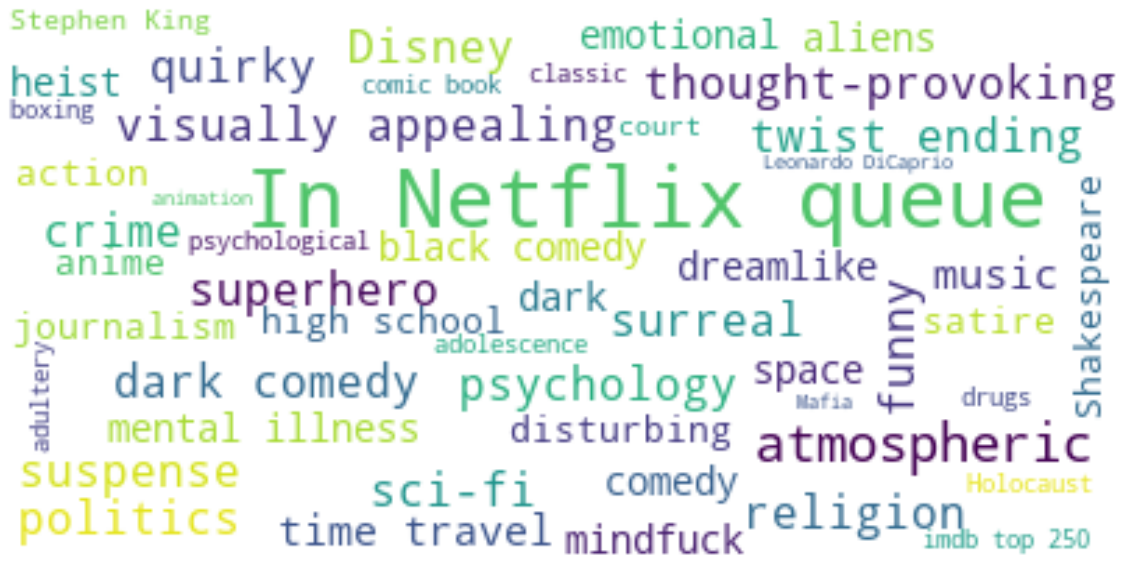

In [61]:
# instantiate a word cloud object
word_cloud = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)

# generate the word cloud
word_cloud.generate_from_frequencies(tag_words)
plt.figure(figsize=(20,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

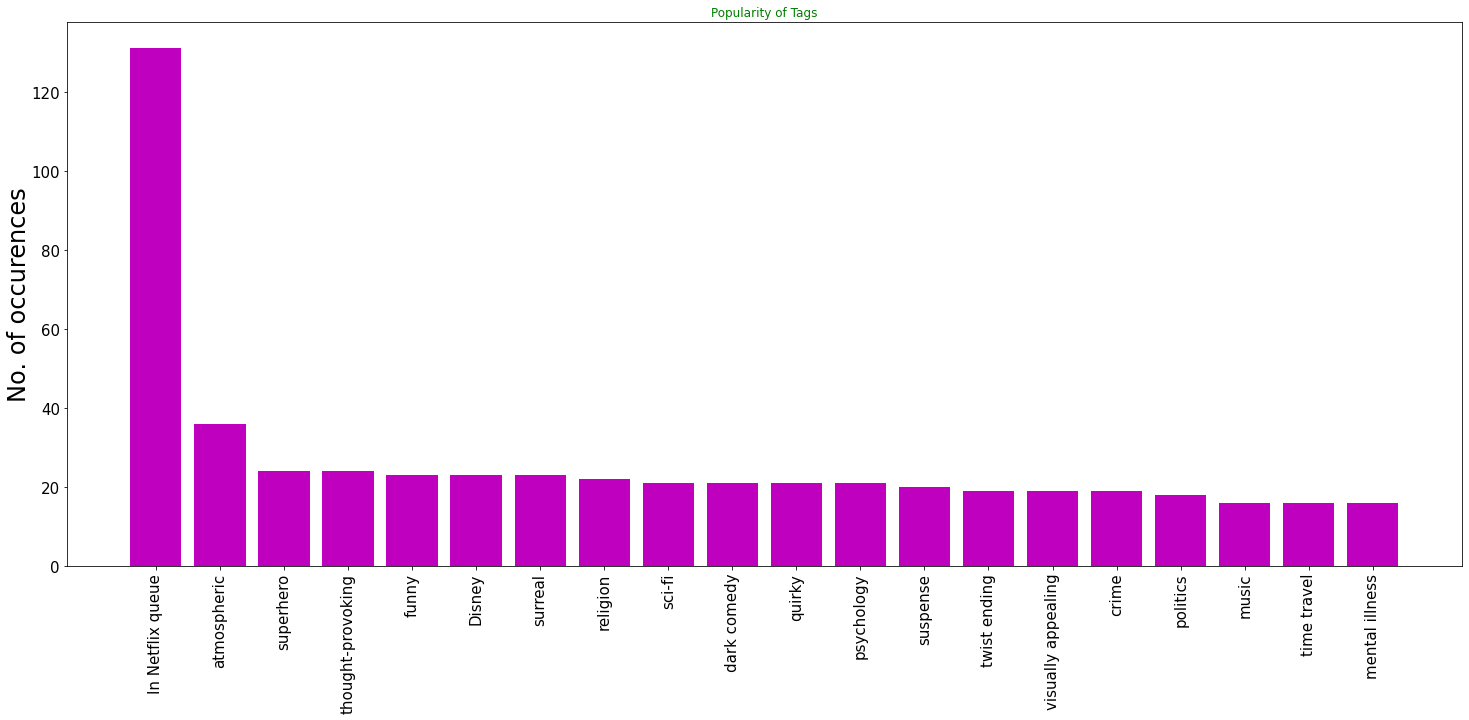

In [62]:
fig = plt.figure(1, figsize=(25,22))
ax2 = fig.add_subplot(2,1,2)
tag_trunc_occurences = tag_keyword_occurences[0:20]

y_axis = [i[1] for i in tag_trunc_occurences]
x_axis = [k for k,i in enumerate(tag_trunc_occurences)]
x_label = [i[0] for i in tag_trunc_occurences]
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='m')
plt.title("Popularity of Tags",color='g')
plt.show()

In [64]:
movies = pd.merge(movies,tags,on='movieId')
movies.head()

,movieId,mean,count,title,genres,Romance,Mystery,Sci-Fi,IMAX,Thriller,...,Musical,Western,Film-Noir,(no genres listed),Crime,Documentary,Drama,Horror,userId,tag
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,336,pixar
1,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,474,pixar
2,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,567,fun
3,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,62,fantasy
4,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,62,magic board game


In [65]:
movies.shape

(3662, 27)

### Recommend movie according to Genre based on average mean

In [66]:
def movie_by_genre():
    genre = input("Please enter genre : ")
    n = int(input("Please enter Number of Recommendation you want : "))
    
    df = pd.DataFrame(movies.loc[(movies[genre]==1)].sort_values(['mean'], ascending=False)[['title', 'genres', 'count','mean']])
    df = df.drop_duplicates()
    
    return df[:n]

In [67]:
movie_by_genre()

Please enter genre : Comedy
Please enter Number of Recommendation you want : 10


,title,genres,count,mean
2516,Into the Woods (1991),Adventure|Comedy|Fantasy|Musical,1,5.000000
2748,"Match Factory Girl, The (Tulitikkutehtaan tytt...",Comedy|Drama,1,5.000000
1847,Crossing Delancey (1988),Comedy|Romance,1,5.000000
1960,"Going Places (Valseuses, Les) (1974)",Comedy|Crime|Drama,1,5.000000
2139,"Awful Truth, The (1937)",Comedy|Romance,2,4.750000
2763,Reefer Madness: The Movie Musical (2005),Comedy|Drama|Musical,2,4.750000
2349,Adam's Rib (1949),Comedy|Romance,4,4.750000
2918,Son of Rambow (2007),Children|Comedy|Drama,3,4.666667
1569,Man Bites Dog (C'est arrivé près de chez vous)...,Comedy|Crime|Drama|Thriller,6,4.500000
2018,"Lavender Hill Mob, The (1951)",Comedy|Crime,2,4.500000


### Recommend movie accroding to Tag based on average mean

In [68]:
def movie_by_tag():
    tag = input("Please enter tag : ")
    n = int(input("Please enter Number of Recommendation you want : "))
    
    df = pd.DataFrame(movies.loc[(movies['tag']==tag)].sort_values(['mean'],
                      ascending=False)[['tag','title','count','mean']])
    
    df = df.drop_duplicates()
    
    return df[:n]

In [71]:
movie_by_tag()

Please enter tag : dark
Please enter Number of Recommendation you want : 10


,tag,title,count,mean
1571,dark,Man Bites Dog (C'est arrivé près de chez vous)...,6,4.500000
3388,dark,"Babadook, The (2014)",3,4.500000
2908,dark,Funny Games U.S. (2007),4,4.375000
3614,dark,Logan (2017),25,4.280000
1439,dark,Fight Club (1999),218,4.272936
2914,dark,"Dark Knight, The (2008)",149,4.238255
266,dark,Pulp Fiction (1994),307,4.197068
1791,dark,Memento (2000),159,4.122642
2891,dark,Cat Soup (Nekojiru-so) (2001),1,4.000000
2126,dark,Irreversible (Irréversible) (2002),9,3.888889


### Recommend movie accroding to Genre and Tags based on average mean

In [72]:
def movie_by_tag_genre():
    genre = input("Please enter Genre : ")
    tag = input("Please enter tag : ")
    n = int(input("Please enter Number of Recommendation you want : "))
    
    df = pd.DataFrame(movies.loc[(movies['tag']==tag) & (movies[genre]==1)].sort_values(['mean'], ascending=False)[['tag', 'title', 'genres', 'count','mean']])
    df = df.drop_duplicates()
    
    return df[:n]

In [75]:
movie_by_tag_genre()

Please enter Genre : Comedy
Please enter tag : politics
Please enter Number of Recommendation you want : 10


,tag,title,genres,count,mean
12,politics,"American President, The (1995)",Comedy|Drama|Romance,70,3.671429
1096,politics,Primary Colors (1998),Comedy|Drama,11,3.500000
779,politics,Bob Roberts (1992),Comedy,17,3.352941
2206,politics,"Legally Blonde 2: Red, White & Blonde (2003)",Comedy,11,2.409091
